In [ ]:
import os
import cv2
import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from keras.api.preprocessing.image import load_img, img_to_array
from keras.api.utils import to_categorical
import glob

In [ ]:
DIR = "/kaggle/input/potato-dataset"
CATEGORIES = ['Potato___Early_blight', 'Healthy___potato', 'Potato___Late_blight']


for category in CATEGORIES:
    path = os.path.join(DIR, category)
    for image in os.listdir(path):
        img_arr = cv2.imread(os.path.join(path, image))
        plt.imshow(img_arr)
        print(img_arr.shape)
        break
    break



(256, 256, 3)


In [ ]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DIR, category)
        classes = CATEGORIES.index(category)

        for image in os.listdir(path):
            img = load_img(os.path.join(path, image), target_size=(224, 224))
            img_arr = img_to_array(img)
            img_arr = img_arr/255
            print("Shape: ", img_arr.shape)
            training_data.append([img_arr, classes])

print(img_arr.shape)

img_data = np.array(training_data)
img_data = img_data.astype('float32')
print (img_data.shape)


create_training_data()

Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (2

In [ ]:
print(len(training_data))
import random

random.shuffle(training_data)

for sample in  training_data[:10]:
    print(sample[1])


3008
2
2
0
1
2
1
0
0
2
2


In [ ]:
features = []
labels = []


for x, y in training_data:
    features.append(x)
    labels.append(y)

features = np.array(features).reshape(-1, 224, 224, 3)

In [ ]:
import pickle

# dumping the features and labels
pickle_out = open("features.pkl","wb")
pickle.dump(features, pickle_out)
pickle_out.close()

pickle_out = open("labels.pkl","wb")
pickle.dump(labels, pickle_out)
pickle_out.close()

In [ ]:
pickle_in_features = open('features.pkl', 'rb')
x = pickle.load(pickle_in_features)
x = np.array(x, dtype=np.float64)

pickle_in_labels = open('labels.pkl', 'rb')
y = pickle.load(pickle_in_labels)
y = np.array(y, dtype=np.int64)

In [ ]:
print(len(x))
print(len(y))

3008
3008


In [ ]:
import pickle
import time
import numpy as np
import pandas as pd
from keras.preprocessing import image
import tensorflow as tf
from keras.applications.mobilenet import preprocess_input, decode_predictions
from keras.layers import Dense, Activation, Flatten, Dropout
# Instead of "from keras.layers import merge, Input", use:
from keras import Input  # Input is now directly under keras
from keras.layers import concatenate # merge is replaced with concatenate
from keras.models import Model
from tensorflow.keras.utils import to_categorical # to_categorical is now here

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=2)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2105, 224, 224, 3)
(2105,)
(903, 224, 224, 3)
(903,)


In [ ]:
from tensorflow import keras
from tensorflow.keras.applications import VGG16 # Import VGG16
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model

classes = 3

image_input = Input(shape=(224, 224, 3))

model = VGG16(input_tensor=image_input, include_top=True, weights='imagenet') # Now VGG16 is defined


last_layer = model.get_layer('fc2').output
X = last_layer
d1 = Dropout(0.3, name='dropout_layer_1')(X)
out = Dense(3, activation='softmax', name='output')(d1) # Updated for 3 classes
custom_vgg_model = Model(image_input, out)
custom_vgg_model.summary()

print(image_input.shape)

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 134,272,835 (512.21 MB)

 Trainable params: 134,272,835 (512.21 MB)

 Non-trainable params: 0 (0.00 B)

(None, 224, 224, 3)


In [ ]:
for layer in custom_vgg_model.layers[:-1]:
    layer.trainable = False

custom_vgg_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

t = time.time()

hist = custom_vgg_model.fit(x_train, y_train, batch_size=32, epochs=35, verbose=2, validation_split=0.2)

print('Training time: %s' % (t - time.time()))



Epoch 1/35
53/53 - 8s - 156ms/step - accuracy: 0.5867 - loss: 0.8905 - val_accuracy: 0.8290 - val_loss: 0.4983
Epoch 2/35
53/53 - 4s - 83ms/step - accuracy: 0.7827 - loss: 0.5197 - val_accuracy: 0.8907 - val_loss: 0.3447
Epoch 3/35
53/53 - 4s - 82ms/step - accuracy: 0.8533 - loss: 0.3839 - val_accuracy: 0.9050 - val_loss: 0.3073
Epoch 4/35
53/53 - 4s - 82ms/step - accuracy: 0.8646 - loss: 0.3495 - val_accuracy: 0.9002 - val_loss: 0.2809
Epoch 5/35
53/53 - 4s - 82ms/step - accuracy: 0.8765 - loss: 0.3123 - val_accuracy: 0.9240 - val_loss: 0.2402
Epoch 6/35
53/53 - 4s - 82ms/step - accuracy: 0.8967 - loss: 0.2923 - val_accuracy: 0.8931 - val_loss: 0.2712
Epoch 7/35
53/53 - 4s - 82ms/step - accuracy: 0.8996 - loss: 0.2696 - val_accuracy: 0.8694 - val_loss: 0.2858
Epoch 8/35
53/53 - 4s - 82ms/step - accuracy: 0.9074 - loss: 0.2522 - val_accuracy: 0.9287 - val_loss: 0.1952
Epoch 9/35
53/53 - 4s - 82ms/step - accuracy: 0.9086 - loss: 0.2420 - val_accuracy: 0.9287 - val_loss: 0.1837
Epoch 10/

In [ ]:
(loss, accuracy) = custom_vgg_model.evaluate(x_test, y_test , batch_size=10, verbose=2)

print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

91/91 - 3s - 32ms/step - accuracy: 0.9646 - loss: 0.1005
[INFO] loss=0.1005, accuracy: 96.4563%


In [ ]:
# Evaluate the model on the test data
(loss, accuracy) = custom_vgg_model.evaluate(x_test, y_test, batch_size=10, verbose=2)

# Print the loss and accuracy
print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss, accuracy * 100))

# Predict the classes for the test data
y_pred = custom_vgg_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# If y_test is one-hot encoded, convert it to multiclass format
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test_classes = np.argmax(y_test, axis=1)
else:
    y_test_classes = y_test

# Generate a classification report
from sklearn.metrics import classification_report

# Print the classification report
print(classification_report(y_test_classes, y_pred_classes))

# Optionally, print the predicted classes
# print("Predicted classes:", y_pred_classes)


91/91 - 3s - 28ms/step - accuracy: 0.9646 - loss: 0.1005
[INFO] loss=0.1005, accuracy: 96.4563%
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       298
           1       0.99      0.98      0.99       290
           2       0.94      0.97      0.95       315

    accuracy                           0.96       903
   macro avg       0.97      0.96      0.97       903
weighted avg       0.96      0.96      0.96       903



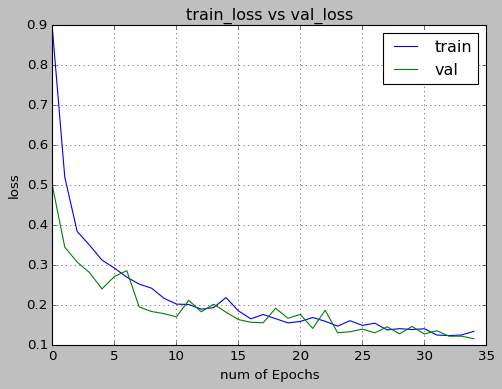

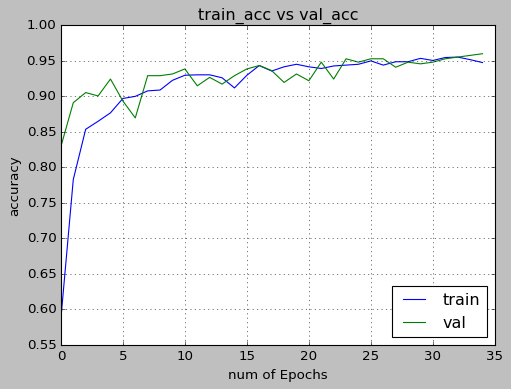

In [ ]:
import matplotlib.pyplot as plt

train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
train_acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
xc = range(35)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
plt.style.use(['classic'])

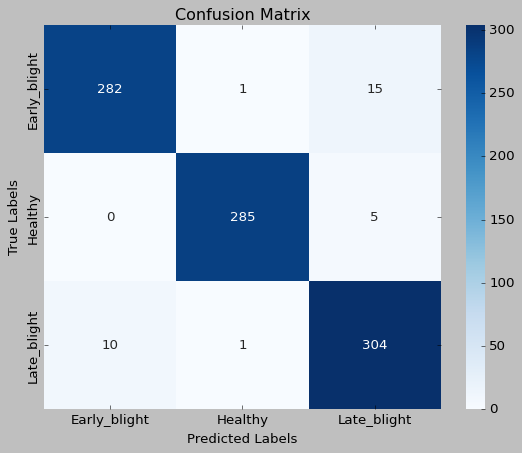

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test_classes and y_pred_classes are already defined
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Early_blight', 'Healthy', 'Late_blight'],
            yticklabels=['Early_blight', 'Healthy', 'Late_blight'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


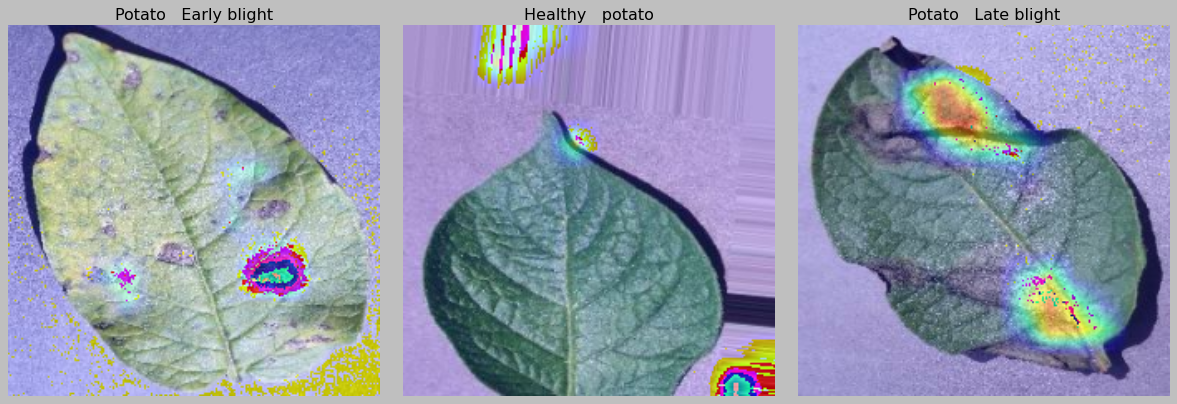

In [ ]:
# === Grad-CAM Utilities ===
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import random
from keras.api.preprocessing.image import load_img, img_to_array

# === Only use these 3 categories (directory names) ===
CATEGORIES = ['Potato___Early_blight', 'Healthy___potato', 'Potato___Late_blight']

def get_img_array(img_path, size):
    img = load_img(img_path, target_size=size)
    array = img_to_array(img)
    array = np.expand_dims(array, axis=0)
    array = array / 255.0
    return array

def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_output = predictions[:, pred_index]

    grads = tape.gradient(class_output, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]

    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

def superimpose_heatmap(img_path, heatmap, alpha=0.4):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    superimposed_img = heatmap * alpha + img
    return np.uint8(superimposed_img)

def display_multiple_gradcams(img_paths, heatmaps, class_names):
    plt.figure(figsize=(15, 5))
    for i in range(3):
        superimposed = superimpose_heatmap(img_paths[i], heatmaps[i])
        plt.subplot(1, 3, i+1)
        plt.imshow(cv2.cvtColor(superimposed, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title(class_names[i].replace('_', ' '))
    plt.tight_layout()
    plt.show()

# === Load one image from each category in CATEGORIES ===
dataset_dir = "/kaggle/input/potato-dataset"
img_paths = []
heatmaps = []
class_names = []

for category in CATEGORIES:
    class_path = os.path.join(dataset_dir, category)
    image_files = os.listdir(class_path)
    random_image = random.choice(image_files)
    img_path = os.path.join(class_path, random_image)

    img_paths.append(img_path)
    class_names.append(category)

    img_array = get_img_array(img_path, size=(224, 224))
    heatmap = make_gradcam_heatmap(img_array, custom_vgg_model, last_conv_layer_name="block5_conv3")
    heatmaps.append(heatmap)

# === Display 3 Grad-CAM results with proper class names ===
display_multiple_gradcams(img_paths, heatmaps, class_names)
